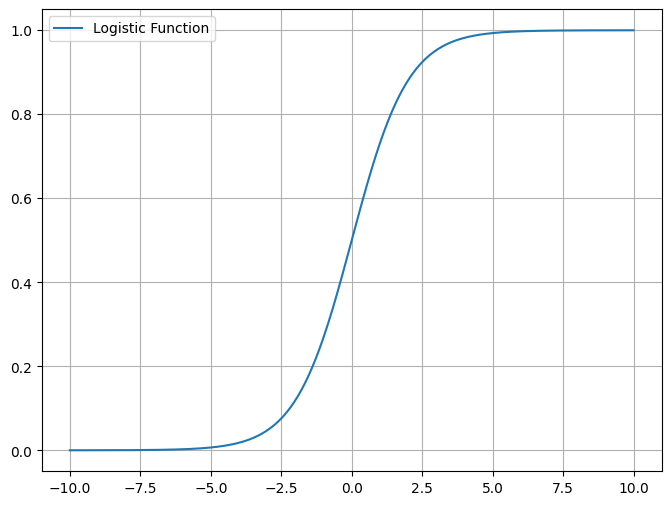

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Definire la funzione logistica
def logistic_function(x):
    return 1 / (1 + np.exp(-x))

# Generare i dati
x = np.linspace(-10, 10, 400)
y = logistic_function(x)

# Disegnare il grafico
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Logistic Function')
plt.grid(True)
plt.legend()
plt.show()

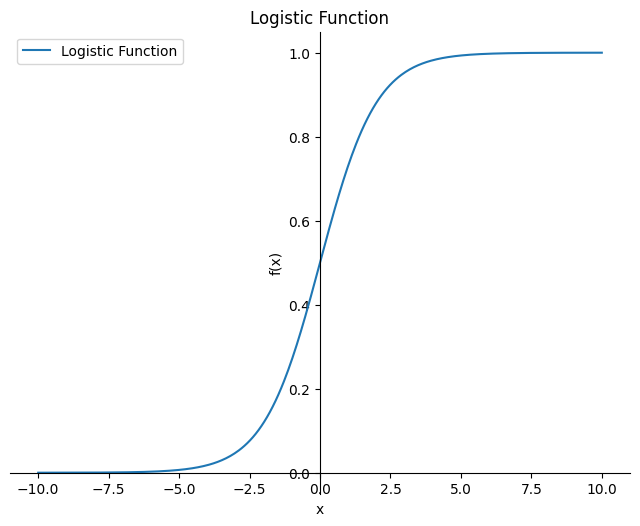

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Definire la funzione logistica
def logistic_function(x):
    return 1 / (1 + np.exp(-x))

# Generare i dati
x = np.linspace(-10, 10, 400)
y = logistic_function(x)

# Disegnare il grafico
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Logistic Function')

# Nascondere i bordi del grafico
plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['left'].set_position('zero')
plt.gca().spines['bottom'].set_position('zero')

# Mostrare solo gli assi x e y
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_ticks_position('left')

plt.title('Logistic Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

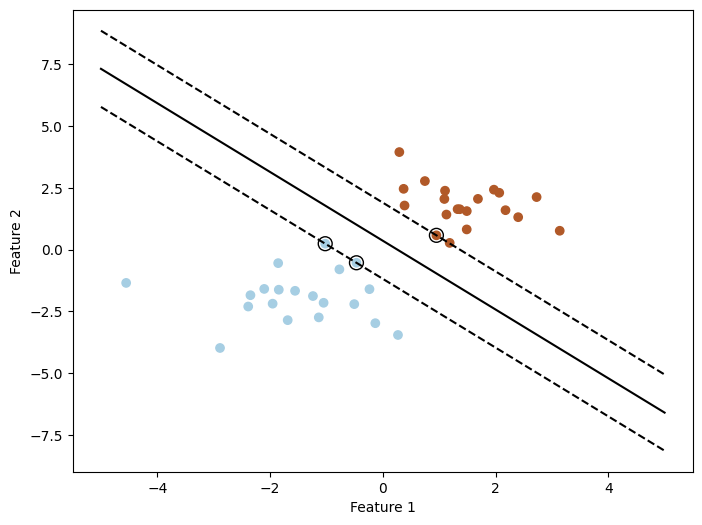

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Generare i dati
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

# Addestrare un modello SVM lineare
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X, Y)

# Calcolare il margine
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# Calcolare le linee di supporto
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

# Disegnare il grafico
plt.figure(figsize=(8, 6))
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

# Disegnare i punti di dati
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

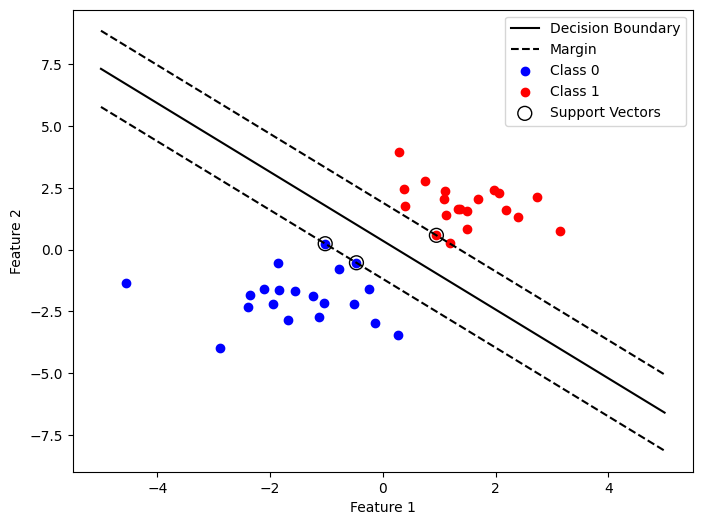

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Generare i dati
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

# Addestrare un modello SVM lineare
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X, Y)

# Calcolare il margine
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# Calcolare le linee di supporto
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

# Disegnare il grafico
plt.figure(figsize=(8, 6))
plt.plot(xx, yy, 'k-', label='Decision Boundary')
plt.plot(xx, yy_down, 'k--', label='Margin')
plt.plot(xx, yy_up, 'k--')

# Disegnare i punti di dati
plt.scatter(X[:20, 0], X[:20, 1], c='b', label='Class 0')
plt.scatter(X[20:, 0], X[20:, 1], c='r', label='Class 1')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

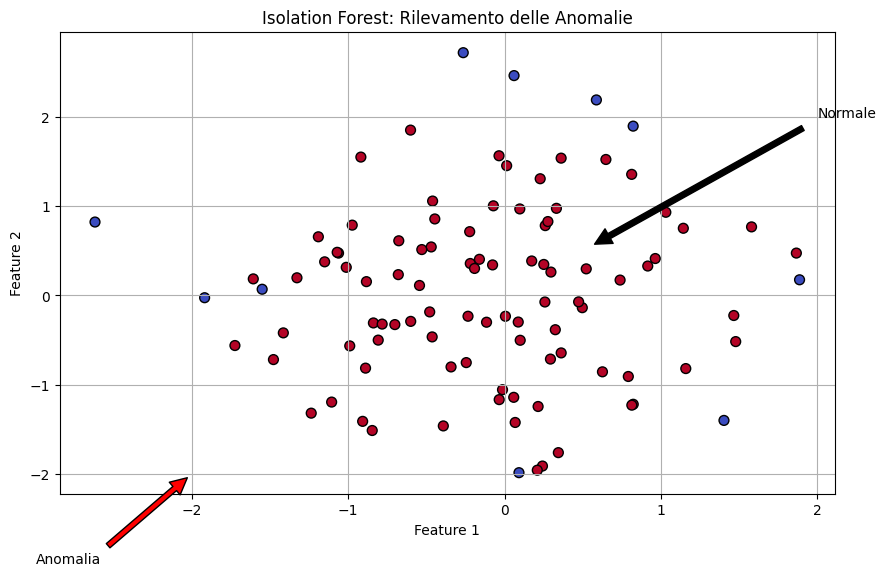

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Generare un dataset di esempio
np.random.seed(42)
X = np.random.randn(100, 2)

# Addestrare un modello di Isolation Forest
clf = IsolationForest(n_estimators=10, contamination=0.1, random_state=42)
clf.fit(X)

# Prevedere le anomalie
y_pred = clf.predict(X)

# Visualizzare il dataset e le previsioni
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm', edgecolor='k', s=50)
plt.title("Isolation Forest: Rilevamento delle Anomalie")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Annotare l'immagine per spiegare il concetto di Isolation Forest
plt.annotate('Normale', xy=(0.5, 0.5), xytext=(2, 2),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Anomalia', xy=(-2, -2), xytext=(-3, -3),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.grid(True)
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

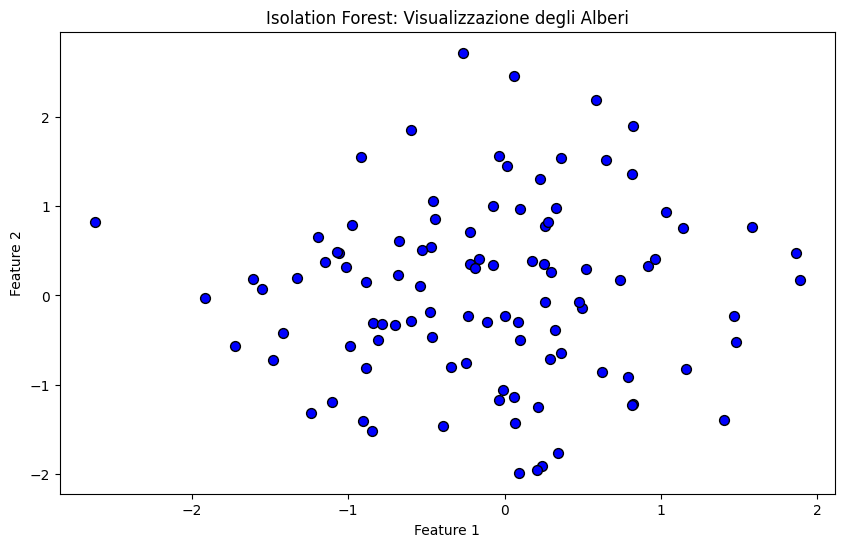

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Generare un dataset di esempio
np.random.seed(42)
X = np.random.randn(100, 2)

# Addestrare un modello di Isolation Forest
clf = IsolationForest(n_estimators=3, contamination=0.1, random_state=42)
clf.fit(X)

# Funzione per disegnare un albero di isolamento
def plot_isolation_tree(tree, ax, X, depth=0, max_depth=3):
    if depth > max_depth:
        return
    
    if tree.feature == -2:
        return
    
    feature = tree.feature
    threshold = tree.threshold
    
    if feature == 0:
        ax.axvline(x=threshold, color='k', linestyle='--')
        left_indices = X[:, feature] < threshold
        right_indices = X[:, feature] >= threshold
    else:
        ax.axhline(y=threshold, color='k', linestyle='--')
        left_indices = X[:, feature] < threshold
        right_indices = X[:, feature] >= threshold
    
    plot_isolation_tree(tree.children_left, ax, X[left_indices], depth + 1, max_depth)
    plot_isolation_tree(tree.children_right, ax, X[right_indices], depth + 1, max_depth)

# Visualizzare il dataset e gli alberi di isolamento
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(X[:, 0], X[:, 1], c='blue', edgecolor='k', s=50)
ax.set_title("Isolation Forest: Visualizzazione degli Alberi")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")

# Disegnare gli alberi di isolamento
for estimator in clf.estimators_:
    plot_isolation_tree(estimator.tree_, ax, X)

plt.grid(True)
plt.show()

NetworkXError: all nodes need a subset_key attribute: <function <lambda> at 0x000001B168A9F920>

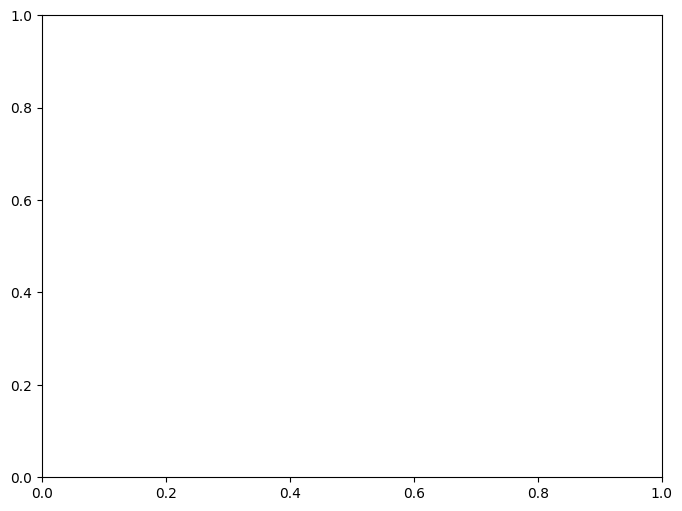

In [3]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a new figure
fig, ax = plt.subplots(figsize=(8, 6))

# Define a function to create the tree graph
def create_tree(levels, start_id=0):
    G = nx.Graph()
    current_level = [start_id]
    node_id = start_id + 1
    for _ in range(levels):
        next_level = []
        for node in current_level:
            left_child = node_id
            right_child = node_id + 1
            G.add_edge(node, left_child)
            G.add_edge(node, right_child)
            next_level.extend([left_child, right_child])
            node_id += 2
        current_level = next_level
    return G

# Create three iTrees with 3 levels
iTree1 = create_tree(3, 0)
iTree2 = create_tree(3, 15)
iTree3 = create_tree(3, 30)

# Set positions for each tree
pos1 = nx.multipartite_layout(iTree1, subset_key=lambda n: n // 2)
pos2 = {k + 15: (v[0] + 2, v[1]) for k, v in pos1.items()}
pos3 = {k + 30: (v[0] + 4, v[1]) for k, v in pos1.items()}

# Draw the trees
nx.draw(iTree1, pos1, with_labels=False, node_size=500, node_color='lightblue', ax=ax)
nx.draw(iTree2, pos2, with_labels=False, node_size=500, node_color='lightblue', ax=ax)
nx.draw(iTree3, pos3, with_labels=False, node_size=500, node_color='lightblue', ax=ax)

# Mark some nodes as anomalies
nx.draw_networkx_nodes(iTree1, pos1, nodelist=[0, 3], node_color='darkblue', node_size=500, ax=ax)
nx.draw_networkx_nodes(iTree2, pos2, nodelist=[15, 18], node_color='darkblue', node_size=500, ax=ax)
nx.draw_networkx_nodes(iTree3, pos3, nodelist=[30, 33], node_color='darkblue', node_size=500, ax=ax)

# Add labels
ax.text(-0.5, 1.1, "Isolation Forest", fontsize=15, ha='center', color='blue')
ax.text(-2.5, 0.9, "iTree 1", fontsize=12, ha='center')
ax.text(0, 0.9, "iTree 2", fontsize=12, ha='center')
ax.text(2.5, 0.9, "iTree 3", fontsize=12, ha='center')

# Add color bar for Anomaly and Normal points
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=1))
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.03, pad=0.1)
cbar.ax.set_yticklabels(['Normal Data Point', 'Anomaly'], fontsize=10)

# Hide axis
plt.axis('off')

# Show plot
plt.show()


NetworkXError: Node 7 has no position.

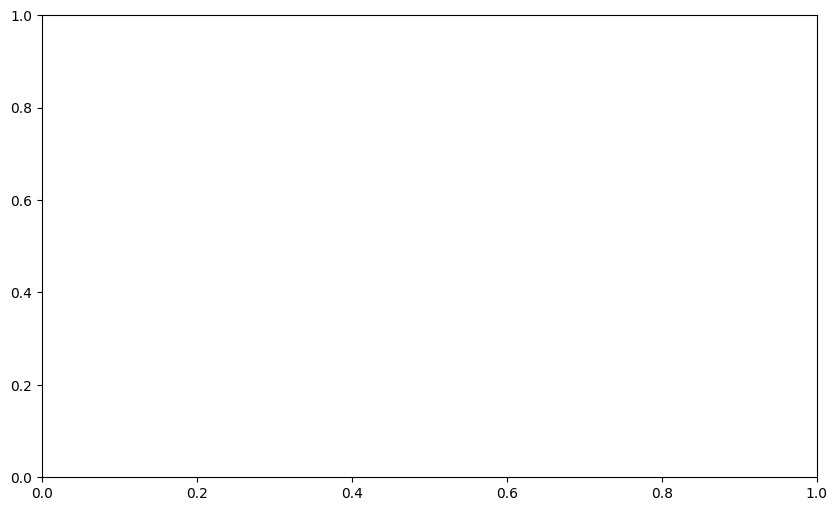

In [4]:
import matplotlib.pyplot as plt
import networkx as nx

# Funzione per creare un albero di isolamento fittizio
def create_tree(depth, start):
    G = nx.Graph()
    for i in range(start, start + 2**depth - 1):
        G.add_node(i)
        if i != start:
            G.add_edge(i, (i - 1) // 2)
    return G

# Creare gli alberi di isolamento
iTree1 = create_tree(3, 0)
iTree2 = create_tree(3, 15)
iTree3 = create_tree(3, 30)

# Assegnare un attributo di sottoinsieme a ciascun nodo
for i, node in enumerate(iTree1.nodes()):
    iTree1.nodes[node]['subset'] = i // 2
for i, node in enumerate(iTree2.nodes()):
    iTree2.nodes[node]['subset'] = i // 2
for i, node in enumerate(iTree3.nodes()):
    iTree3.nodes[node]['subset'] = i // 2

# Unire gli alberi in un unico grafo
G = nx.compose_all([iTree1, iTree2, iTree3])

# Set positions for each tree
pos1 = nx.multipartite_layout(iTree1, subset_key='subset')
pos2 = {k + 15: (v[0] + 2, v[1]) for k, v in pos1.items()}
pos3 = {k + 30: (v[0] + 4, v[1]) for k, v in pos1.items()}

# Unire le posizioni
pos = {**pos1, **pos2, **pos3}

# Disegnare il grafo
fig, ax = plt.subplots(figsize=(10, 6))
nx.draw(G, pos, with_labels=False, node_size=500, node_color='lightblue', ax=ax)

# Mark some nodes as anomalies
nx.draw_networkx_nodes(G, pos, nodelist=[0, 3, 15, 18, 30, 33], node_color='darkblue', node_size=500, ax=ax)

# Add labels
ax.text(-0.5, 1.1, "Isolation Forest", fontsize=15, ha='center', color='blue')
ax.text(-2.5, 0.9, "iTree 1", fontsize=12, ha='center')
ax.text(0, 0.9, "iTree 2", fontsize=12, ha='center')
ax.text(2.5, 0.9, "iTree 3", fontsize=12, ha='center')

# Add color bar for Anomaly and Normal points
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=1))
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.03, pad=0.1)
cbar.ax.set_yticklabels(['Normal Data Point', 'Anomaly'], fontsize=10)

# Hide axis
plt.axis('off')

# Show plot
plt.show()

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

# Funzione per creare un albero di isolamento fittizio
def create_tree(depth, start):
    G = nx.Graph()
    for i in range(start, start + 2**depth - 1):
        G.add_node(i)
        if i != start:
            G.add_edge(i, (i - 1) // 2)
    return G

# Creare gli alberi di isolamento
iTree1 = create_tree(3, 0)
iTree2 = create_tree(3, 15)
iTree3 = create_tree(3, 30)

# Unire gli alberi in un unico grafo
G = nx.compose_all([iTree1, iTree2, iTree3])

# Set positions for each tree
pos1 = nx.multipartite_layout(iTree1, subset_key=lambda x: x // 2)
pos2 = {k + 15: (v[0] + 2, v[1]) for k, v in pos1.items()}
pos3 = {k + 30: (v[0] + 4, v[1]) for k, v in pos1.items()}

# Unire le posizioni
pos = {**pos1, **pos2, **pos3}

# Disegnare il grafo
fig, ax = plt.subplots(figsize=(10, 6))
nx.draw(G, pos, with_labels=False, node_size=500, node_color='lightblue', ax=ax)

# Mark some nodes as anomalies
nx.draw_networkx_nodes(G, pos, nodelist=[0, 3, 15, 18, 30, 33], node_color='darkblue', node_size=500, ax=ax)

# Add labels
ax.text(-0.5, 1.1, "Isolation Forest", fontsize=15, ha='center', color='blue')
ax.text(-2.5, 0.9, "iTree 1", fontsize=12, ha='center')
ax.text(0, 0.9, "iTree 2", fontsize=12, ha='center')
ax.text(2.5, 0.9, "iTree 3", fontsize=12, ha='center')

# Add color bar for Anomaly and Normal points
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=1))
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.03, pad=0.1)
cbar.ax.set_yticklabels(['Normal Data Point', 'Anomaly'], fontsize=10)

# Hide axis
plt.axis('off')

# Show plot
plt.show()


NetworkXError: all nodes need a subset_key attribute: <function <lambda> at 0x000001B168DD7740>

In [7]:
import matplotlib.pyplot as plt
import networkx as nx

# Funzione per creare un albero di isolamento fittizio
def create_tree(depth, start):
    G = nx.Graph()
    for i in range(start, start + 2**depth - 1):
        G.add_node(i)
        if i != start:
            G.add_edge(i, (i - 1) // 2)
    return G

# Creare gli alberi di isolamento
iTree1 = create_tree(3, 0)
iTree2 = create_tree(3, 15)
iTree3 = create_tree(3, 30)

# Unire gli alberi in un unico grafo
G = nx.compose_all([iTree1, iTree2, iTree3])

# Set positions for each tree
pos1 = nx.multipartite_layout(iTree1, subset_key=lambda x: x // 2)
pos2 = {k + 15: (v[0] + 2, v[1]) for k, v in pos1.items()}
pos3 = {k + 30: (v[0] + 4, v[1]) for k, v in pos1.items()}

# Unire le posizioni
pos = {**pos1, **pos2, **pos3}

# Disegnare il grafo
fig, ax = plt.subplots(figsize=(10, 6))
nx.draw(G, pos, with_labels=False, node_size=500, node_color='lightblue', ax=ax)

# Mark some nodes as anomalies
nx.draw_networkx_nodes(G, pos, nodelist=[0, 3, 15, 18, 30, 33], node_color='darkblue', node_size=500, ax=ax)

# Add labels
ax.text(-0.5, 1.1, "Isolation Forest", fontsize=15, ha='center', color='blue')
ax.text(-2.5, 0.9, "iTree 1", fontsize=12, ha='center')
ax.text(0, 0.9, "iTree 2", fontsize=12, ha='center')
ax.text(2.5, 0.9, "iTree 3", fontsize=12, ha='center')

# Add color bar for Anomaly and Normal points
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=1))
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.03, pad=0.1)
cbar.ax.set_yticklabels(['Normal Data Point', 'Anomaly'], fontsize=10)

# Hide axis
plt.axis('off')

# Show plot
plt.show()


NetworkXError: all nodes need a subset_key attribute: <function <lambda> at 0x000001B168DD40E0>

C:\Users\Nicolò Caradonna\AppData\Local\Temp\ipykernel_10264\3652876329.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(['Normal Data Point', 'Anomaly'], fontsize=10)


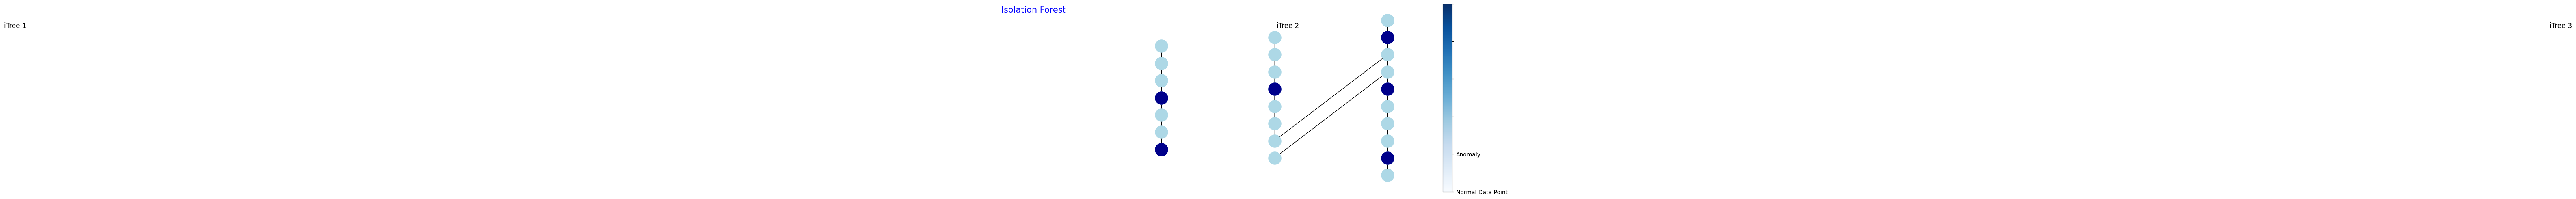

In [8]:
import matplotlib.pyplot as plt
import networkx as nx

# Funzione per creare un albero di isolamento fittizio
def create_tree(depth, start):
    G = nx.Graph()
    for i in range(start, start + 2**depth - 1):
        G.add_node(i)
        if i != start:
            G.add_edge(i, (i - 1) // 2)
    return G

# Creare gli alberi di isolamento
iTree1 = create_tree(3, 0)
iTree2 = create_tree(3, 15)
iTree3 = create_tree(3, 30)

# Aggiungi un attributo di sottoinsieme per ciascun nodo
for node in iTree1.nodes:
    iTree1.nodes[node]['subset'] = 0  # Sottoinsieme 0 per il primo albero
for node in iTree2.nodes:
    iTree2.nodes[node]['subset'] = 1  # Sottoinsieme 1 per il secondo albero
for node in iTree3.nodes:
    iTree3.nodes[node]['subset'] = 2  # Sottoinsieme 2 per il terzo albero

# Unire gli alberi in un unico grafo
G = nx.compose_all([iTree1, iTree2, iTree3])

# Set positions for each tree
pos = nx.multipartite_layout(G, subset_key='subset')

# Disegnare il grafo
fig, ax = plt.subplots(figsize=(10, 6))
nx.draw(G, pos, with_labels=False, node_size=500, node_color='lightblue', ax=ax)

# Mark some nodes as anomalies
nx.draw_networkx_nodes(G, pos, nodelist=[0, 3, 15, 18, 30, 33], node_color='darkblue', node_size=500, ax=ax)

# Add labels
ax.text(-0.5, 1.1, "Isolation Forest", fontsize=15, ha='center', color='blue')
ax.text(-2.5, 0.9, "iTree 1", fontsize=12, ha='center')
ax.text(0, 0.9, "iTree 2", fontsize=12, ha='center')
ax.text(2.5, 0.9, "iTree 3", fontsize=12, ha='center')

# Add color bar for Anomaly and Normal points
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=1))
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.03, pad=0.1)
cbar.ax.set_yticklabels(['Normal Data Point', 'Anomaly'], fontsize=10)

# Hide axis
plt.axis('off')

# Show plot
plt.show()


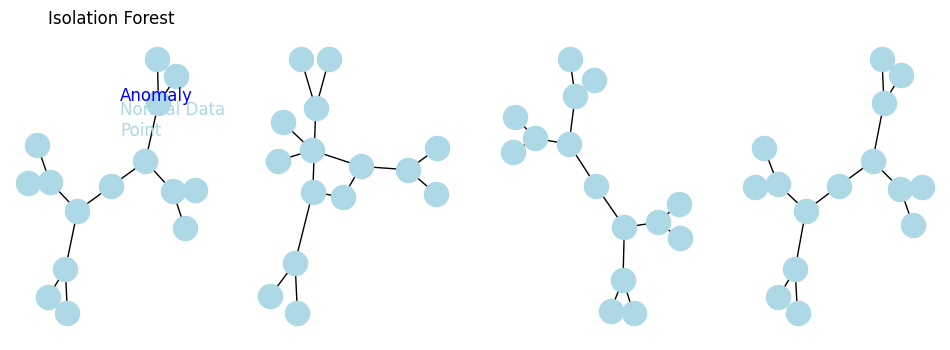

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

# Creazione di un esempio di albero
G = nx.balanced_tree(2, 3)  # Un albero bilanciato con profondità 3

# Funzione per disegnare un albero
def draw_tree(G, ax, pos=None):
    if pos is None:
        pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=False, node_size=300, node_color='lightblue', ax=ax)

# Creazione della figura
fig, ax = plt.subplots(1, 4, figsize=(12, 4))

# Disegniamo gli alberi
for i in range(4):
    draw_tree(G, ax[i])

# Creazione della legenda
ax[0].set_title("Isolation Forest")
ax[0].text(0.1, 0.5, "Anomaly", color='blue', fontsize=12)
ax[0].text(0.1, 0.3, "Normal Data\nPoint", color='lightblue', fontsize=12)
ax[0].axis('off')

# Salvataggio dell'immagine
plt.savefig("isolation_forest.png")
plt.show()

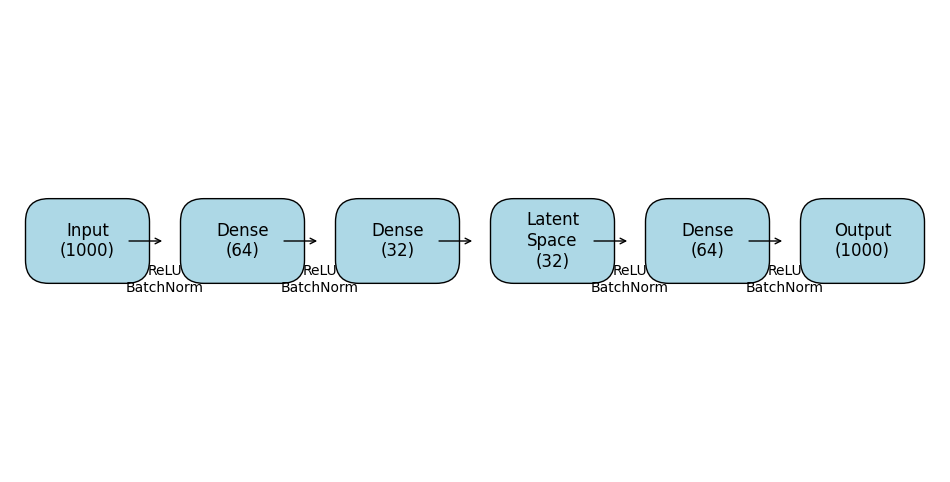

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_layer(ax, center, width, height, label):
    rect = patches.FancyBboxPatch(
        (center[0] - width / 2, center[1] - height / 2),
        width, height,
        boxstyle="round,pad=0.3",
        edgecolor='black',
        facecolor='lightblue'
    )
    ax.add_patch(rect)
    ax.text(center[0], center[1], label, ha='center', va='center', fontsize=12)

def draw_autoencoder():
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.set_xlim(0, 12)
    ax.set_ylim(0, 6)
    ax.axis('off')

    # Input Layer
    draw_layer(ax, (1, 3), 1, 0.5, "Input\n(1000)")

    # Encoder Layers
    draw_layer(ax, (3, 3), 1, 0.5, "Dense\n(64)")
    draw_layer(ax, (5, 3), 1, 0.5, "Dense\n(32)")

    # Latent Space
    draw_layer(ax, (7, 3), 1, 0.5, "Latent\nSpace\n(32)")

    # Decoder Layers
    draw_layer(ax, (9, 3), 1, 0.5, "Dense\n(64)")
    draw_layer(ax, (11, 3), 1, 0.5, "Output\n(1000)")

    # Arrows
    arrowprops = dict(facecolor='black', arrowstyle='->')
    ax.annotate('', xy=(2, 3), xytext=(1.5, 3), arrowprops=arrowprops)
    ax.annotate('', xy=(4, 3), xytext=(3.5, 3), arrowprops=arrowprops)
    ax.annotate('', xy=(6, 3), xytext=(5.5, 3), arrowprops=arrowprops)
    ax.annotate('', xy=(8, 3), xytext=(7.5, 3), arrowprops=arrowprops)
    ax.annotate('', xy=(10, 3), xytext=(9.5, 3), arrowprops=arrowprops)

    # Annotations for ReLU and Batch Normalization
    ax.text(2, 2.5, "ReLU\nBatchNorm", ha='center', va='center', fontsize=10)
    ax.text(4, 2.5, "ReLU\nBatchNorm", ha='center', va='center', fontsize=10)
    ax.text(8, 2.5, "ReLU\nBatchNorm", ha='center', va='center', fontsize=10)
    ax.text(10, 2.5, "ReLU\nBatchNorm", ha='center', va='center', fontsize=10)

    plt.show()

draw_autoencoder()

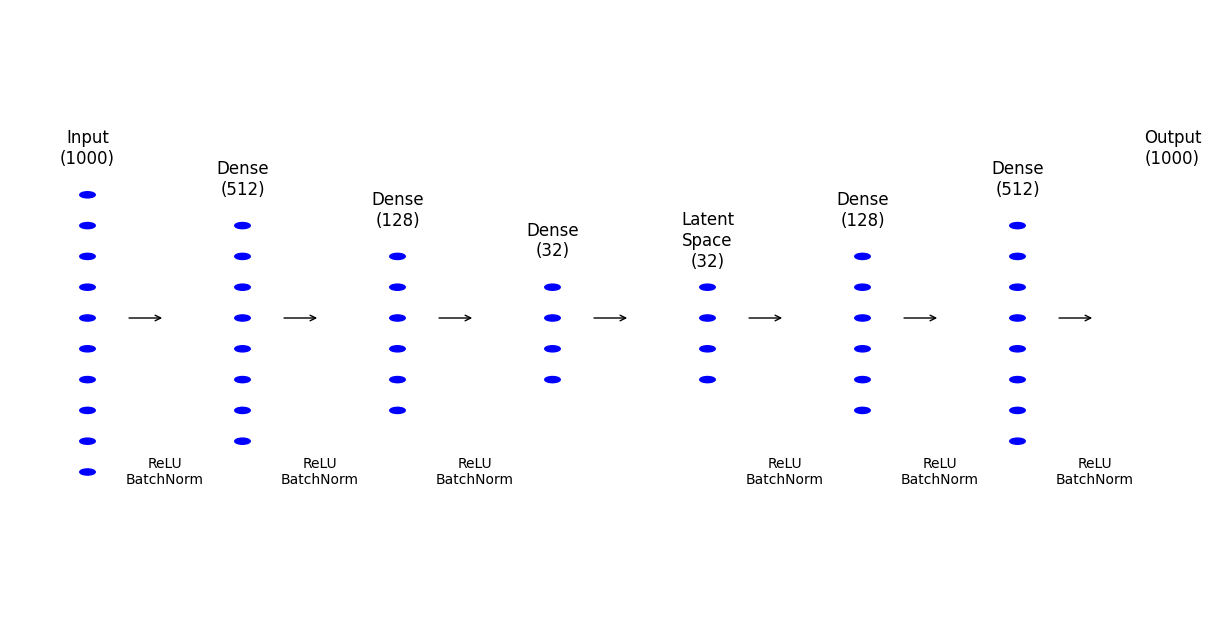

In [2]:
import matplotlib.pyplot as plt

def draw_layer(ax, center, num_neurons, layer_label):
    y_positions = [center[1] + i for i in range(-num_neurons//2, num_neurons//2)]
    for y in y_positions:
        circle = plt.Circle((center[0], y), 0.1, color='blue', fill=True)
        ax.add_patch(circle)
    ax.text(center[0], center[1] + num_neurons//2 + 0.5, layer_label, ha='center', va='center', fontsize=12)

def draw_autoencoder():
    fig, ax = plt.subplots(figsize=(14, 8))
    ax.set_xlim(0, 14)
    ax.set_ylim(-10, 10)
    ax.axis('off')

    # Input Layer
    draw_layer(ax, (1, 0), 10, "Input\n(1000)")

    # Encoder Layers
    draw_layer(ax, (3, 0), 8, "Dense\n(512)")
    draw_layer(ax, (5, 0), 6, "Dense\n(128)")
    draw_layer(ax, (7, 0), 4, "Dense\n(32)")

    # Latent Space
    draw_layer(ax, (9, 0), 4, "Latent\nSpace\n(32)")

    # Decoder Layers
    draw_layer(ax, (11, 0), 6, "Dense\n(128)")
    draw_layer(ax, (13, 0), 8, "Dense\n(512)")
    draw_layer(ax, (15, 0), 10, "Output\n(1000)")

    # Arrows
    arrowprops = dict(facecolor='black', arrowstyle='->')
    ax.annotate('', xy=(2, 0), xytext=(1.5, 0), arrowprops=arrowprops)
    ax.annotate('', xy=(4, 0), xytext=(3.5, 0), arrowprops=arrowprops)
    ax.annotate('', xy=(6, 0), xytext=(5.5, 0), arrowprops=arrowprops)
    ax.annotate('', xy=(8, 0), xytext=(7.5, 0), arrowprops=arrowprops)
    ax.annotate('', xy=(10, 0), xytext=(9.5, 0), arrowprops=arrowprops)
    ax.annotate('', xy=(12, 0), xytext=(11.5, 0), arrowprops=arrowprops)
    ax.annotate('', xy=(14, 0), xytext=(13.5, 0), arrowprops=arrowprops)

    # Annotations for ReLU and Batch Normalization
    ax.text(2, -5, "ReLU\nBatchNorm", ha='center', va='center', fontsize=10)
    ax.text(4, -5, "ReLU\nBatchNorm", ha='center', va='center', fontsize=10)
    ax.text(6, -5, "ReLU\nBatchNorm", ha='center', va='center', fontsize=10)
    ax.text(10, -5, "ReLU\nBatchNorm", ha='center', va='center', fontsize=10)
    ax.text(12, -5, "ReLU\nBatchNorm", ha='center', va='center', fontsize=10)
    ax.text(14, -5, "ReLU\nBatchNorm", ha='center', va='center', fontsize=10)

    plt.show()

draw_autoencoder()import matplotlib.pyplot as plt

def draw_layer(ax, center, num_neurons, layer_label):
    y_positions = [center[1] + i for i in range(-num_neurons//2, num_neurons//2)]
    for y in y_positions:
        circle = plt.Circle((center[0], y), 0.3, color='blue', fill=True)  # Aumentato il raggio a 0.3
        ax.add_patch(circle)
    ax.text(center[0], center[1] + num_neurons//2 + 1, layer_label, ha='center', va='center', fontsize=12)  # Aumentato lo spazio per l'etichetta

def draw_autoencoder():
    fig, ax = plt.subplots(figsize=(14, 8))
    ax.set_xlim(0, 16)
    ax.set_ylim(-10, 10)
    ax.axis('off')

    # Input Layer
    draw_layer(ax, (1, 0), 10, "Input\n(1000)")

    # Encoder Layers
    draw_layer(ax, (3, 0), 8, "Dense\n(512)")
    draw_layer(ax, (5, 0), 6, "Dense\n(128)")
    draw_layer(ax, (7, 0), 4, "Dense\n(32)")

    # Latent Space
    draw_layer(ax, (9, 0), 4, "Latent\nSpace\n(32)")

    # Decoder Layers
    draw_layer(ax, (11, 0), 6, "Dense\n(128)")
    draw_layer(ax, (13, 0), 8, "Dense\n(512)")
    draw_layer(ax, (15, 0), 10, "Output\n(1000)")

    # Arrows
    arrowprops = dict(facecolor='black', arrowstyle='->')
    ax.annotate('', xy=(2, 0), xytext=(1.5, 0), arrowprops=arrowprops)
    ax.annotate('', xy=(4, 0), xytext=(3.5, 0), arrowprops=arrowprops)
    ax.annotate('', xy=(6, 0), xytext=(5.5, 0), arrowprops=arrowprops)
    ax.annotate('', xy=(8, 0), xytext=(7.5, 0), arrowprops=arrowprops)
    ax.annotate('', xy=(10, 0), xytext=(9.5, 0), arrowprops=arrowprops)
    ax.annotate('', xy=(12, 0), xytext=(11.5, 0), arrowprops=arrowprops)
    ax.annotate('', xy=(14, 0), xytext=(13.5, 0), arrowprops=arrowprops)

    # Annotations for ReLU and Batch Normalization
    ax.text(2, -5, "ReLU\nBatchNorm", ha='center', va='center', fontsize=10)
    ax.text(4, -5, "ReLU\nBatchNorm", ha='center', va='center', fontsize=10)
    ax.text(6, -5, "ReLU\nBatchNorm", ha='center', va='center', fontsize=10)
    ax.text(10, -5, "ReLU\nBatchNorm", ha='center', va='center', fontsize=10)
    ax.text(12, -5, "ReLU\nBatchNorm", ha='center', va='center', fontsize=10)
    ax.text(14, -5, "ReLU\nBatchNorm", ha='center', va='center', fontsize=10)

    plt.show()

draw_autoencoder()

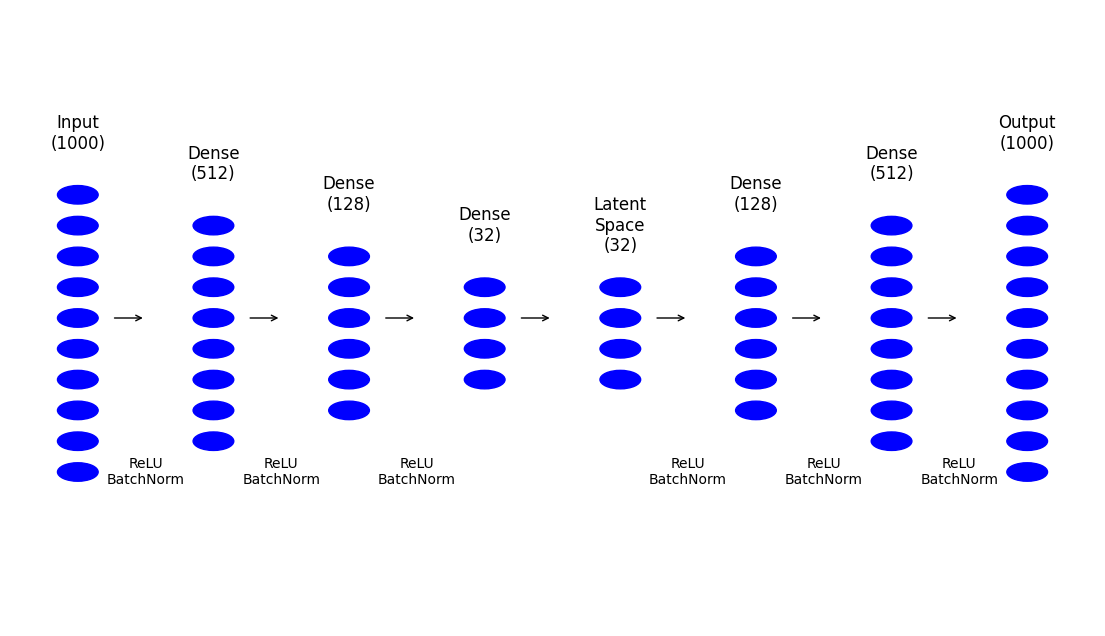

In [3]:
import matplotlib.pyplot as plt

def draw_layer(ax, center, num_neurons, layer_label):
    y_positions = [center[1] + i for i in range(-num_neurons//2, num_neurons//2)]
    for y in y_positions:
        circle = plt.Circle((center[0], y), 0.3, color='blue', fill=True)  # Aumentato il raggio a 0.3
        ax.add_patch(circle)
    ax.text(center[0], center[1] + num_neurons//2 + 1, layer_label, ha='center', va='center', fontsize=12)  # Aumentato lo spazio per l'etichetta

def draw_autoencoder():
    fig, ax = plt.subplots(figsize=(14, 8))
    ax.set_xlim(0, 16)
    ax.set_ylim(-10, 10)
    ax.axis('off')

    # Input Layer
    draw_layer(ax, (1, 0), 10, "Input\n(1000)")

    # Encoder Layers
    draw_layer(ax, (3, 0), 8, "Dense\n(512)")
    draw_layer(ax, (5, 0), 6, "Dense\n(128)")
    draw_layer(ax, (7, 0), 4, "Dense\n(32)")

    # Latent Space
    draw_layer(ax, (9, 0), 4, "Latent\nSpace\n(32)")

    # Decoder Layers
    draw_layer(ax, (11, 0), 6, "Dense\n(128)")
    draw_layer(ax, (13, 0), 8, "Dense\n(512)")
    draw_layer(ax, (15, 0), 10, "Output\n(1000)")

    # Arrows
    arrowprops = dict(facecolor='black', arrowstyle='->')
    ax.annotate('', xy=(2, 0), xytext=(1.5, 0), arrowprops=arrowprops)
    ax.annotate('', xy=(4, 0), xytext=(3.5, 0), arrowprops=arrowprops)
    ax.annotate('', xy=(6, 0), xytext=(5.5, 0), arrowprops=arrowprops)
    ax.annotate('', xy=(8, 0), xytext=(7.5, 0), arrowprops=arrowprops)
    ax.annotate('', xy=(10, 0), xytext=(9.5, 0), arrowprops=arrowprops)
    ax.annotate('', xy=(12, 0), xytext=(11.5, 0), arrowprops=arrowprops)
    ax.annotate('', xy=(14, 0), xytext=(13.5, 0), arrowprops=arrowprops)

    # Annotations for ReLU and Batch Normalization
    ax.text(2, -5, "ReLU\nBatchNorm", ha='center', va='center', fontsize=10)
    ax.text(4, -5, "ReLU\nBatchNorm", ha='center', va='center', fontsize=10)
    ax.text(6, -5, "ReLU\nBatchNorm", ha='center', va='center', fontsize=10)
    ax.text(10, -5, "ReLU\nBatchNorm", ha='center', va='center', fontsize=10)
    ax.text(12, -5, "ReLU\nBatchNorm", ha='center', va='center', fontsize=10)
    ax.text(14, -5, "ReLU\nBatchNorm", ha='center', va='center', fontsize=10)

    plt.show()

draw_autoencoder()

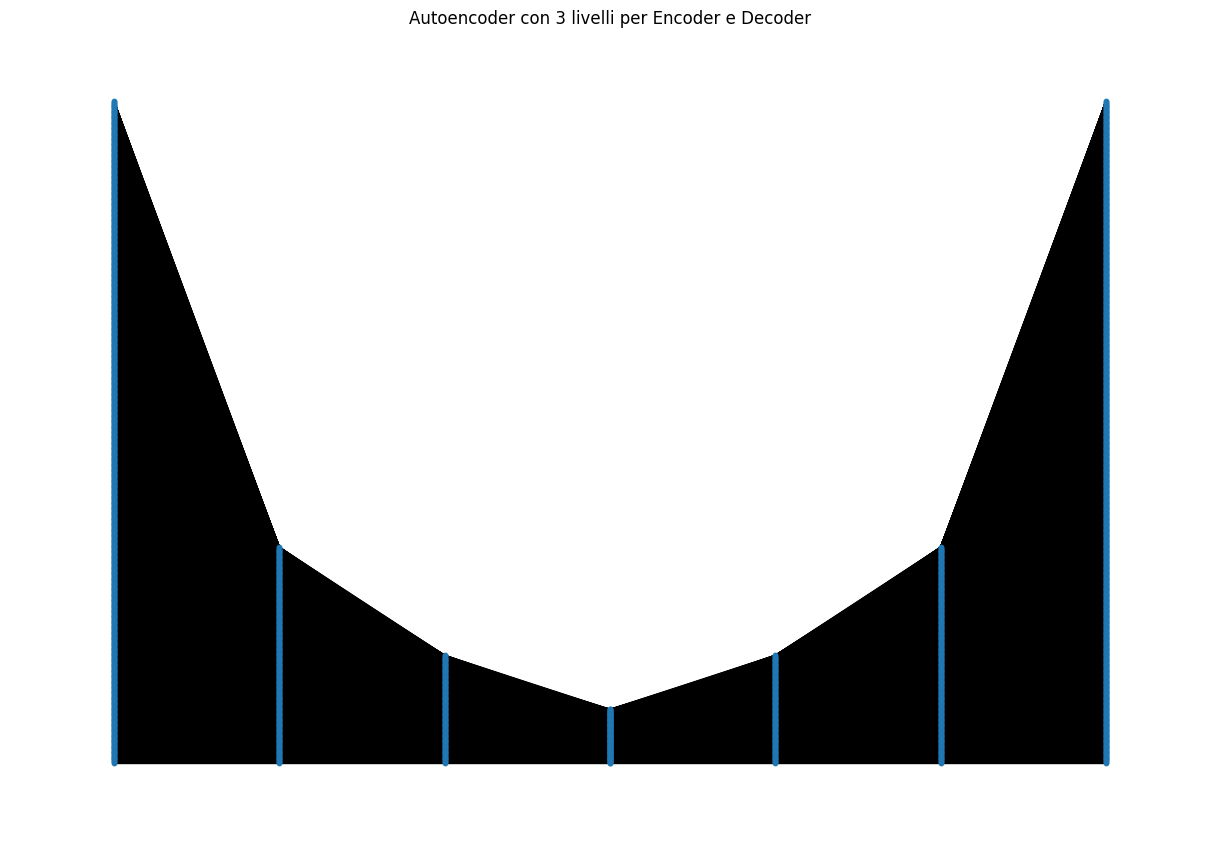

In [4]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_autoencoder():
    G = nx.DiGraph()
    
    # Aggiungere nodi per l'encoder
    encoder_layers = [784, 256, 128, 64]
    for i in range(len(encoder_layers) - 1):
        for j in range(encoder_layers[i]):
            G.add_node(f'e{i}_{j}', pos=(i, j))
        for j in range(encoder_layers[i + 1]):
            G.add_node(f'e{i+1}_{j}', pos=(i + 1, j))
        for j in range(encoder_layers[i]):
            for k in range(encoder_layers[i + 1]):
                G.add_edge(f'e{i}_{j}', f'e{i+1}_{k}')
    
    # Aggiungere nodi per il decoder
    decoder_layers = [64, 128, 256, 784]
    offset = len(encoder_layers) - 1
    for i in range(len(decoder_layers) - 1):
        for j in range(decoder_layers[i]):
            G.add_node(f'd{i}_{j}', pos=(i + offset, j))
        for j in range(decoder_layers[i + 1]):
            G.add_node(f'd{i+1}_{j}', pos=(i + 1 + offset, j))
        for j in range(decoder_layers[i]):
            for k in range(decoder_layers[i + 1]):
                G.add_edge(f'd{i}_{j}', f'd{i+1}_{k}')
    
    pos = nx.get_node_attributes(G, 'pos')
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, node_size=10, with_labels=False, arrows=False)
    plt.title('Autoencoder con 3 livelli per Encoder e Decoder')
    plt.show()

draw_autoencoder()

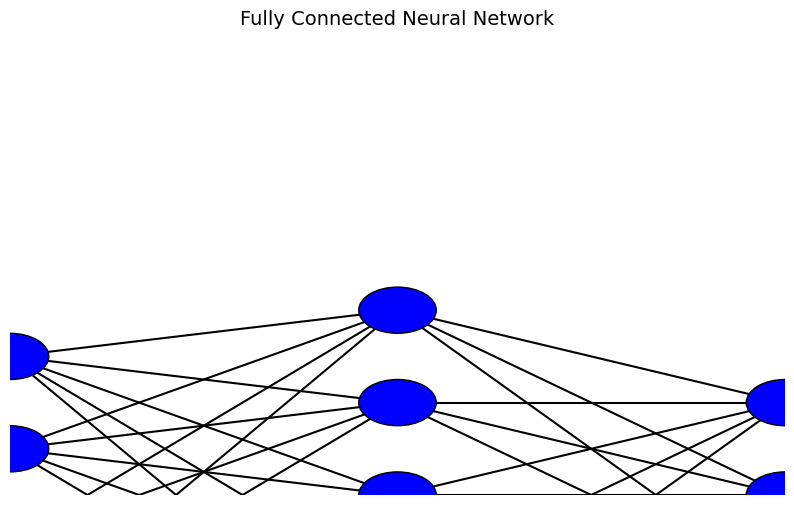

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def draw_fully_connected_nn(layer_sizes):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.axis('off')

    v_spacing = 1 / float(max(layer_sizes))
    h_spacing = 1 / float(len(layer_sizes) - 1)

    # Drawing each layer
    for i, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing * (layer_size - 1) / 2
        for j in range(layer_size):
            neuron_center = (i * h_spacing, layer_top - j * v_spacing)
            circle = plt.Circle(neuron_center, v_spacing / 4, color='blue', ec='black', zorder=4)
            ax.add_artist(circle)

    # Drawing lines between layers
    for i, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing * (layer_size_a - 1) / 2
        layer_top_b = v_spacing * (layer_size_b - 1) / 2
        for j in range(layer_size_a):
            for k in range(layer_size_b):
                neuron_a = (i * h_spacing, layer_top_a - j * v_spacing)
                neuron_b = ((i + 1) * h_spacing, layer_top_b - k * v_spacing)
                line = plt.Line2D([neuron_a[0], neuron_b[0]], [neuron_a[1], neuron_b[1]], c='black', zorder=1)
                ax.add_artist(line)

    plt.title('Fully Connected Neural Network', fontsize=14)
    plt.show()

# Example fully connected network with 3 layers: input (4 neurons), hidden (5 neurons), output (3 neurons)
draw_fully_connected_nn([4, 5, 3])
import matplotlib.pyplot as plt
import numpy as np

def draw_fully_connected_nn(layer_sizes):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.axis('off')

    v_spacing = 1 / float(max(layer_sizes))
    h_spacing = 1 / float(len(layer_sizes) - 1)

    # Disegnare ogni livello
    for i, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing * (layer_size - 1) / 2
        for j in range(layer_size):
            neuron_center = (i * h_spacing, layer_top - j * v_spacing)
            circle = plt.Circle(neuron_center, v_spacing / 4, color='blue', ec='black', zorder=4)
            ax.add_artist(circle)

    # Disegnare le linee tra i livelli
    for i, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing * (layer_size_a - 1) / 2
        layer_top_b = v_spacing * (layer_size_b - 1) / 2
        for j in range(layer_size_a):
            for k in range(layer_size_b):
                neuron_a = (i * h_spacing, layer_top_a - j * v_spacing)
                neuron_b = ((i + 1) * h_spacing, layer_top_b - k * v_spacing)
                line = plt.Line2D([neuron_a[0], neuron_b[0]], [neuron_a[1], neuron_b[1]], c='black', zorder=1)
                ax.add_artist(line)

    plt.title('Fully Connected Neural Network', fontsize=14)
    plt.show()

# Esempio di rete completamente connessa con 3 livelli: input (4 neuroni), hidden (5 neuroni), output (3 neuroni)
draw_fully_connected_nn([4, 5, 3])

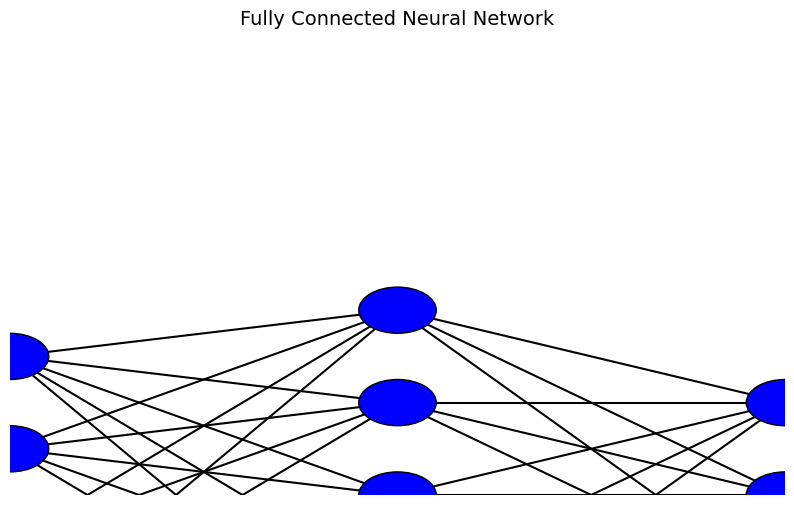

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def draw_fully_connected_nn(layer_sizes):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.axis('off')

    v_spacing = 1 / float(max(layer_sizes))
    h_spacing = 1 / float(len(layer_sizes) - 1)

    # Disegnare ogni livello
    for i, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing * (layer_size - 1) / 2
        for j in range(layer_size):
            neuron_center = (i * h_spacing, layer_top - j * v_spacing)
            circle = plt.Circle(neuron_center, v_spacing / 4, color='blue', ec='black', zorder=4)
            ax.add_artist(circle)

    # Disegnare le linee tra i livelli
    for i, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing * (layer_size_a - 1) / 2
        layer_top_b = v_spacing * (layer_size_b - 1) / 2
        for j in range(layer_size_a):
            for k in range(layer_size_b):
                neuron_a = (i * h_spacing, layer_top_a - j * v_spacing)
                neuron_b = ((i + 1) * h_spacing, layer_top_b - k * v_spacing)
                line = plt.Line2D([neuron_a[0], neuron_b[0]], [neuron_a[1], neuron_b[1]], c='black', zorder=1)
                ax.add_artist(line)

    plt.title('Fully Connected Neural Network', fontsize=14)
    plt.show()

# Esempio di rete completamente connessa con 3 livelli: input (4 neuroni), hidden (5 neuroni), output (3 neuroni)
draw_fully_connected_nn([4, 5, 3])

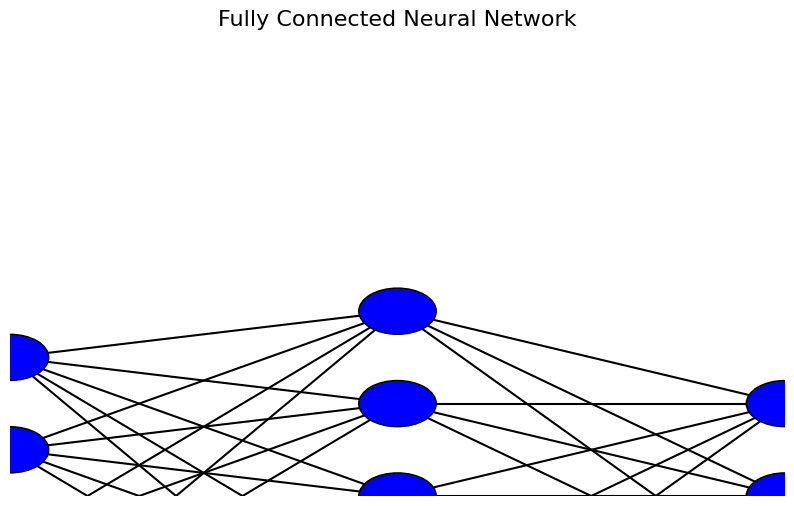

In [7]:
import matplotlib.pyplot as plt

def draw_fully_connected_nn(layers):
    # Setup the figure
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.axis('off')

    # Horizontal and vertical spacing for layers and neurons
    h_spacing = 1 / (len(layers) - 1)
    v_spacing = 1 / max(layers)

    # Draw the neurons
    for i, layer_size in enumerate(layers):
        x_pos = i * h_spacing
        y_positions = [v_spacing * (n - (layer_size - 1) / 2) for n in range(layer_size)]
        for y_pos in y_positions:
            circle = plt.Circle((x_pos, y_pos), 0.05, color='blue', ec='black', zorder=4)
            ax.add_artist(circle)

    # Draw the connections between neurons
    for i, (layer_size_a, layer_size_b) in enumerate(zip(layers[:-1], layers[1:])):
        x_pos_a = i * h_spacing
        x_pos_b = (i + 1) * h_spacing
        y_positions_a = [v_spacing * (n - (layer_size_a - 1) / 2) for n in range(layer_size_a)]
        y_positions_b = [v_spacing * (n - (layer_size_b - 1) / 2) for n in range(layer_size_b)]
        for y_a in y_positions_a:
            for y_b in y_positions_b:
                line = plt.Line2D([x_pos_a, x_pos_b], [y_a, y_b], c='black', zorder=1)
                ax.add_artist(line)

    plt.title('Fully Connected Neural Network', fontsize=16)
    plt.show()

# Example: Network with input layer (4 neurons), hidden layer (5 neurons), and output layer (3 neurons)
draw_fully_connected_nn([4, 5, 3])


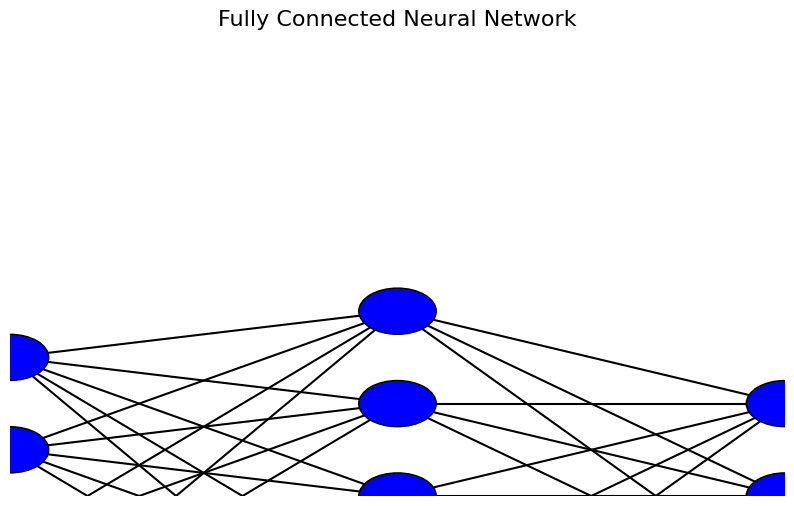

In [8]:
import matplotlib.pyplot as plt

def draw_fully_connected_nn(layers):
    # Setup the figure
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.axis('off')

    # Horizontal and vertical spacing for layers and neurons
    h_spacing = 1 / (len(layers) - 1)
    v_spacing = 1 / max(layers)

    # Draw the neurons
    for i, layer_size in enumerate(layers):
        x_pos = i * h_spacing
        y_positions = [v_spacing * (n - (layer_size - 1) / 2) for n in range(layer_size)]
        for y_pos in y_positions:
            circle = plt.Circle((x_pos, y_pos), 0.05, color='blue', ec='black', zorder=4)
            ax.add_artist(circle)

    # Draw the connections between neurons
    for i, (layer_size_a, layer_size_b) in enumerate(zip(layers[:-1], layers[1:])):
        x_pos_a = i * h_spacing
        x_pos_b = (i + 1) * h_spacing
        y_positions_a = [v_spacing * (n - (layer_size_a - 1) / 2) for n in range(layer_size_a)]
        y_positions_b = [v_spacing * (n - (layer_size_b - 1) / 2) for n in range(layer_size_b)]
        for y_a in y_positions_a:
            for y_b in y_positions_b:
                line = plt.Line2D([x_pos_a, x_pos_b], [y_a, y_b], c='black', zorder=1)
                ax.add_artist(line)

    plt.title('Fully Connected Neural Network', fontsize=16)
    plt.show()

# Example: Network with input layer (4 neurons), hidden layer (5 neurons), and output layer (3 neurons)
draw_fully_connected_nn([4, 5, 3])

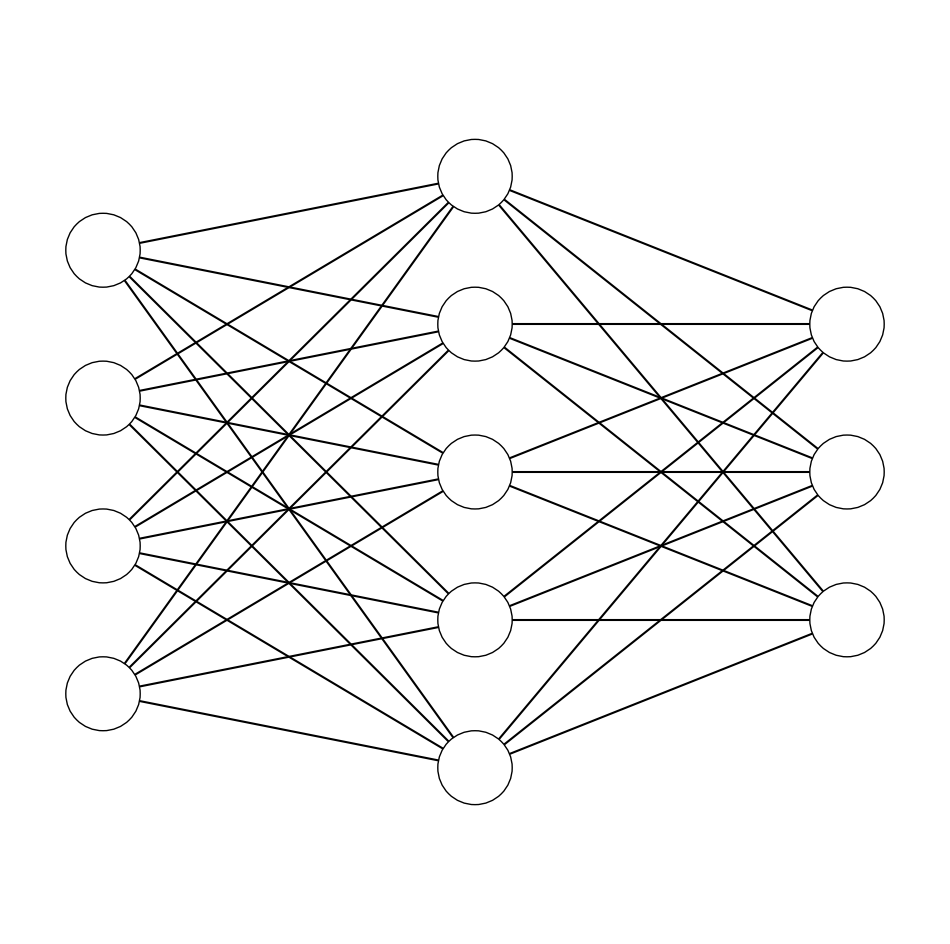

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :param ax: matplotlib axis
    :param left: The leftmost coordinate of the figure
    :param right: The rightmost coordinate of the figure
    :param bottom: The bottommost coordinate of the figure
    :param top: The topmost coordinate of the figure
    :param layer_sizes: List containing the number of neurons in each layer
    '''
    
    v_spacing = (top - bottom) / float(max(layer_sizes))
    h_spacing = (right - left) / float(len(layer_sizes) - 1)

    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing * (layer_size - 1) / 2. + (top + bottom) / 2.
        for m in range(layer_size):
            circle = plt.Circle((n * h_spacing + left, layer_top - m * v_spacing), v_spacing / 4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
            # Label nodes with the number of neuron
            ax.text(n * h_spacing + left, layer_top - m * v_spacing, str(m+1), ha='center', va='center')

    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing * (layer_size_a - 1) / 2. + (top + bottom) / 2.
        layer_top_b = v_spacing * (layer_size_b - 1) / 2. + (top + bottom) / 2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n * h_spacing + left, (n + 1) * h_spacing + left],
                                  [layer_top_a - m * v_spacing, layer_top_b - o * v_spacing], c='k')
                ax.add_artist(line)

# Example usage
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')

# Define the size of each layer (e.g., 4 input neurons, 5 hidden neurons, and 3 output neurons)
layer_sizes = [4, 5, 3]
draw_neural_net(ax, 0.1, 0.9, 0.1, 0.9, layer_sizes)

plt.show()


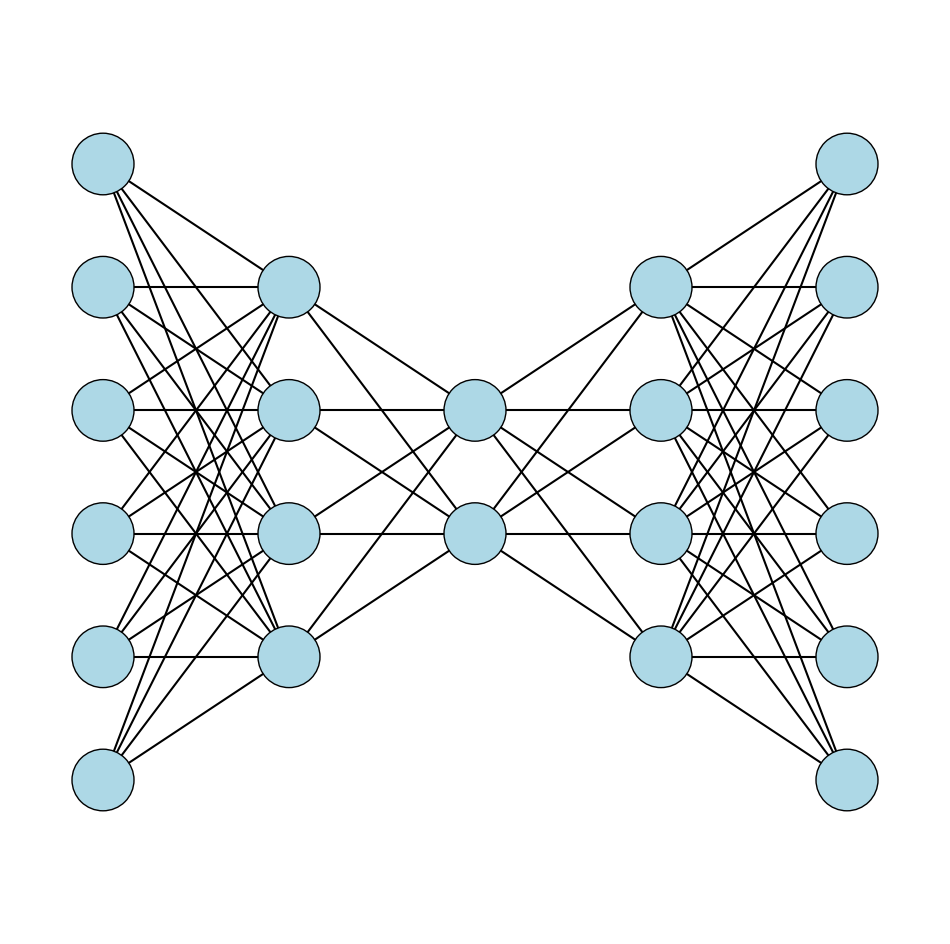

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :param ax: matplotlib axis
    :param left: The leftmost coordinate of the figure
    :param right: The rightmost coordinate of the figure
    :param bottom: The bottommost coordinate of the figure
    :param top: The topmost coordinate of the figure
    :param layer_sizes: List containing the number of neurons in each layer
    '''
    
    v_spacing = (top - bottom) / float(max(layer_sizes))
    h_spacing = (right - left) / float(len(layer_sizes) - 1)

    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing * (layer_size - 1) / 2. + (top + bottom) / 2.
        for m in range(layer_size):
            # Color the neurons in light blue ('lightblue')
            circle = plt.Circle((n * h_spacing + left, layer_top - m * v_spacing), v_spacing / 4.,
                                color='lightblue', ec='k', zorder=4)
            ax.add_artist(circle)
            # Label nodes with the number of neuron
            ax.text(n * h_spacing + left, layer_top - m * v_spacing, str(m+1), ha='center', va='center')

    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing * (layer_size_a - 1) / 2. + (top + bottom) / 2.
        layer_top_b = v_spacing * (layer_size_b - 1) / 2. + (top + bottom) / 2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n * h_spacing + left, (n + 1) * h_spacing + left],
                                  [layer_top_a - m * v_spacing, layer_top_b - o * v_spacing], c='k')
                ax.add_artist(line)

# Example usage for an autoencoder
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')

# Define the structure of an autoencoder: input -> hidden -> bottleneck -> hidden -> output
# For example, an autoencoder with 6 input neurons, 4 hidden neurons, 2 bottleneck neurons,
# and a symmetric decoding part with 4 and 6 neurons.
layer_sizes = [6, 4, 2, 4, 6]
draw_neural_net(ax, 0.1, 0.9, 0.1, 0.9, layer_sizes)

plt.show()


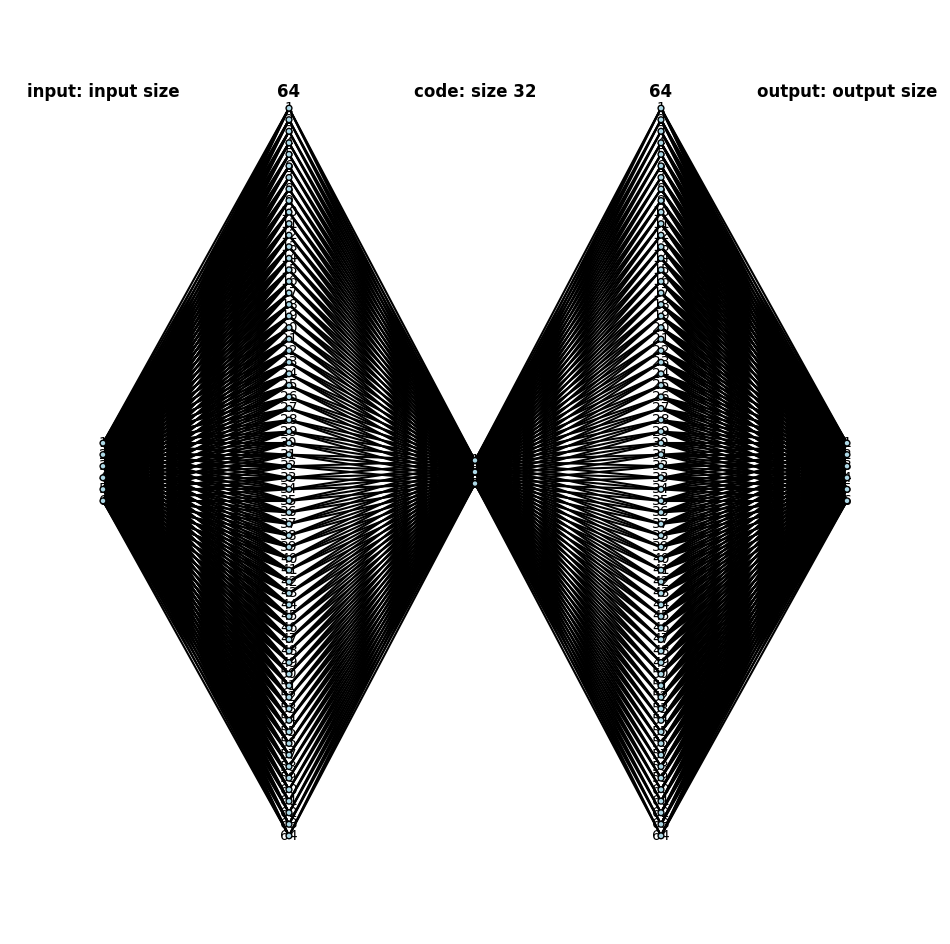

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def draw_neural_net(ax, left, right, bottom, top, layer_sizes, layer_labels):
    '''
    Draw a neural network cartoon using matplotlib.
    
    :param ax: matplotlib axis
    :param left: The leftmost coordinate of the figure
    :param right: The rightmost coordinate of the figure
    :param bottom: The bottommost coordinate of the figure
    :param top: The topmost coordinate of the figure
    :param layer_sizes: List containing the number of neurons in each layer
    :param layer_labels: List containing the labels for each layer
    '''
    
    v_spacing = (top - bottom) / float(max(layer_sizes))
    h_spacing = (right - left) / float(len(layer_sizes) - 1)

    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing * (layer_size - 1) / 2. + (top + bottom) / 2.
        for m in range(layer_size):
            # Color the neurons in light blue ('lightblue')
            circle = plt.Circle((n * h_spacing + left, layer_top - m * v_spacing), v_spacing / 4.,
                                color='lightblue', ec='k', zorder=4)
            ax.add_artist(circle)
            # Label nodes with the number of neuron (optional: comment out if not needed)
            ax.text(n * h_spacing + left, layer_top - m * v_spacing, str(m+1), ha='center', va='center')

        # Add layer label at the top of each layer
        ax.text(n * h_spacing + left, top + v_spacing / 2, layer_labels[n], ha='center', fontsize=12, fontweight='bold')

    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing * (layer_size_a - 1) / 2. + (top + bottom) / 2.
        layer_top_b = v_spacing * (layer_size_b - 1) / 2. + (top + bottom) / 2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n * h_spacing + left, (n + 1) * h_spacing + left],
                                  [layer_top_a - m * v_spacing, layer_top_b - o * v_spacing], c='k')
                ax.add_artist(line)

# Example usage for an autoencoder with custom labels
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')

# Define the structure of an autoencoder: input -> hidden -> bottleneck (code) -> hidden -> output
layer_sizes = [6, 64, 3, 64, 6]  # input: 6 neurons, hidden: 64, code: 3 neurons, and symmetric decoding part

# Define the labels for each layer
layer_labels = ['input: input size', '64', 'code: size 32', '64', 'output: output size']

# Draw the neural network with labels
draw_neural_net(ax, 0.1, 0.9, 0.1, 0.9, layer_sizes, layer_labels)

plt.show()


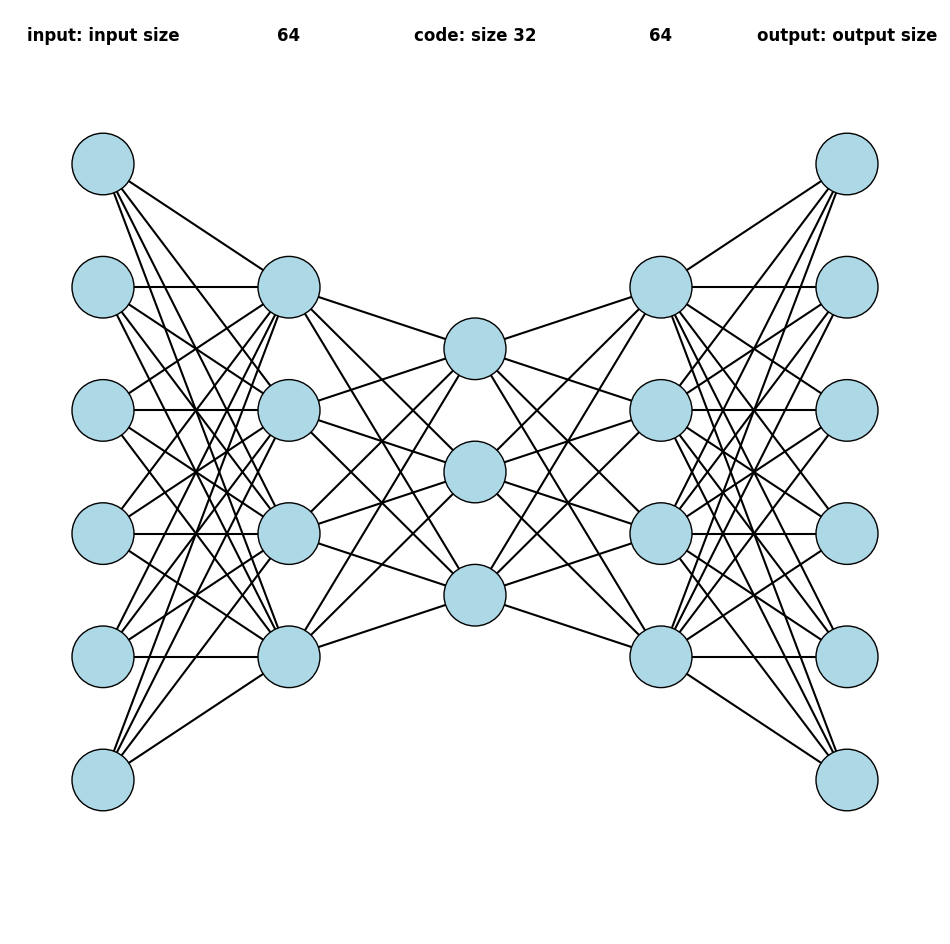

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def draw_neural_net(ax, left, right, bottom, top, layer_sizes, layer_labels):
    '''
    Draw a neural network cartoon using matplotlib.
    
    :param ax: matplotlib axis
    :param left: The leftmost coordinate of the figure
    :param right: The rightmost coordinate of the figure
    :param bottom: The bottommost coordinate of the figure
    :param top: The topmost coordinate of the figure
    :param layer_sizes: List containing the number of neurons in each layer
    :param layer_labels: List containing the labels for each layer
    '''
    
    v_spacing = (top - bottom) / float(max(layer_sizes))
    h_spacing = (right - left) / float(len(layer_sizes) - 1)

    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing * (layer_size - 1) / 2. + (top + bottom) / 2.
        for m in range(layer_size):
            # Color the neurons in light blue ('lightblue')
            circle = plt.Circle((n * h_spacing + left, layer_top - m * v_spacing), v_spacing / 4.,
                                color='lightblue', ec='k', zorder=4)
            ax.add_artist(circle)

        # Add layer label at the top of each layer
        ax.text(n * h_spacing + left, top + v_spacing / 2, layer_labels[n], ha='center', fontsize=12, fontweight='bold')

    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing * (layer_size_a - 1) / 2. + (top + bottom) / 2.
        layer_top_b = v_spacing * (layer_size_b - 1) / 2. + (top + bottom) / 2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n * h_spacing + left, (n + 1) * h_spacing + left],
                                  [layer_top_a - m * v_spacing, layer_top_b - o * v_spacing], c='k')
                ax.add_artist(line)

# Example usage for an autoencoder with custom labels
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')

# Define the structure of an autoencoder: input -> hidden -> bottleneck (code) -> hidden -> output
layer_sizes = [6, 4, 3, 4, 6]  # input: 6 neurons, hidden: 4, code: 3 neurons, and symmetric decoding part

# Define the labels for each layer
layer_labels = ['input: input size', '64', 'code: size 32', '64', 'output: output size']

# Draw the neural network with labels
draw_neural_net(ax, 0.1, 0.9, 0.1, 0.9, layer_sizes, layer_labels)

plt.show()


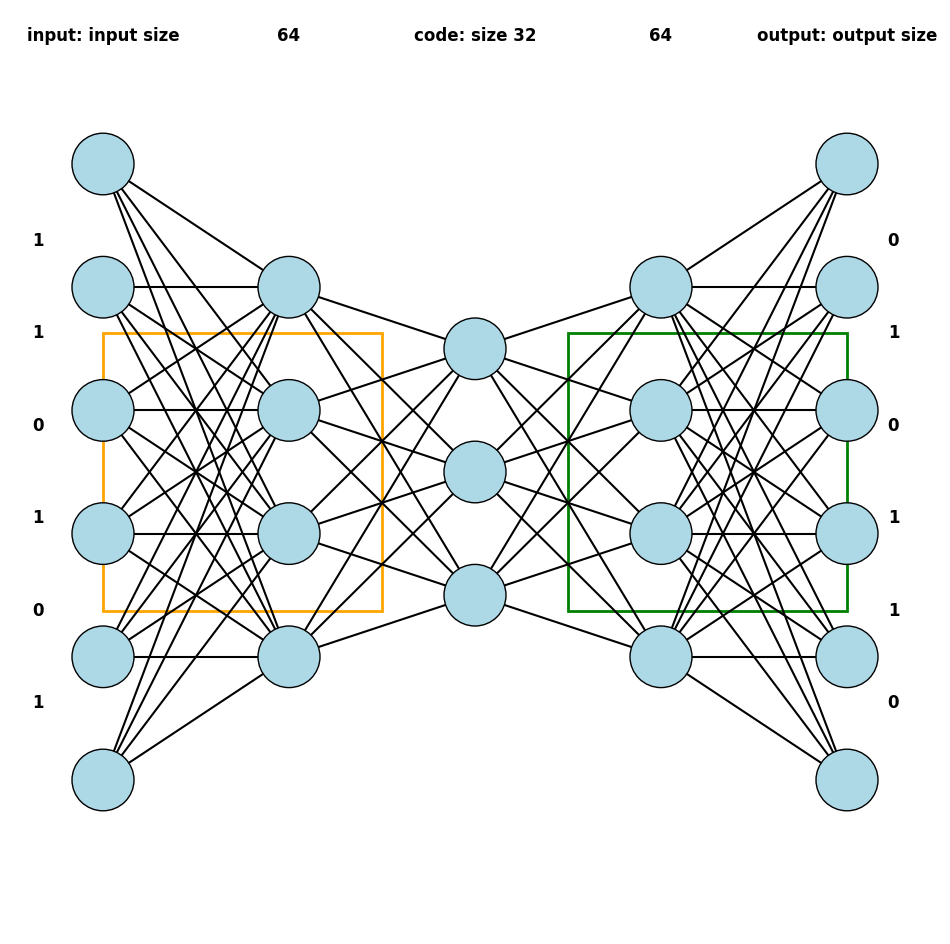

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def draw_neural_net(ax, left, right, bottom, top, layer_sizes, layer_labels):
    '''
    Draw a neural network cartoon using matplotlib.
    
    :param ax: matplotlib axis
    :param left: The leftmost coordinate of the figure
    :param right: The rightmost coordinate of the figure
    :param bottom: The bottommost coordinate of the figure
    :param top: The topmost coordinate of the figure
    :param layer_sizes: List containing the number of neurons in each layer
    :param layer_labels: List containing the labels for each layer
    '''
    
    v_spacing = (top - bottom) / float(max(layer_sizes))
    h_spacing = (right - left) / float(len(layer_sizes) - 1)

    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing * (layer_size - 1) / 2. + (top + bottom) / 2.
        for m in range(layer_size):
            # Color the neurons in light blue ('lightblue')
            circle = plt.Circle((n * h_spacing + left, layer_top - m * v_spacing), v_spacing / 4.,
                                color='lightblue', ec='k', zorder=4)
            ax.add_artist(circle)

        # Add layer label at the top of each layer
        ax.text(n * h_spacing + left, top + v_spacing / 2, layer_labels[n], ha='center', fontsize=12, fontweight='bold')

    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing * (layer_size_a - 1) / 2. + (top + bottom) / 2.
        layer_top_b = v_spacing * (layer_size_b - 1) / 2. + (top + bottom) / 2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n * h_spacing + left, (n + 1) * h_spacing + left],
                                  [layer_top_a - m * v_spacing, layer_top_b - o * v_spacing], c='k')
                ax.add_artist(line)

# Example usage for an autoencoder with custom labels
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')

# Define the structure of an autoencoder: input -> hidden -> bottleneck (code) -> hidden -> output
layer_sizes = [6, 4, 3, 4, 6]  # input: 6 neurons, hidden: 4, code: 3 neurons, and symmetric decoding part

# Define the labels for each layer
layer_labels = ['input: input size', '64', 'code: size 32', '64', 'output: output size']

# Draw the neural network with labels
draw_neural_net(ax, 0.1, 0.9, 0.1, 0.9, layer_sizes, layer_labels)

# Draw rectangles around encoder and decoder
encoder_rect = plt.Rectangle((0.1, 0.35), 0.3, 0.3, fill=False, edgecolor='orange', linewidth=2, label='Encoder')
decoder_rect = plt.Rectangle((0.6, 0.35), 0.3, 0.3, fill=False, edgecolor='green', linewidth=2, label='Decoder')
ax.add_artist(encoder_rect)
ax.add_artist(decoder_rect)

# Draw input vector (0s and 1s)
input_vector = [1, 0, 1, 0, 1, 1]  # Example input vector
for i, value in enumerate(input_vector):
    ax.text(0.03, 0.5 + (i - 2.5) * 0.1, str(value), ha='center', va='center', fontsize=12, fontweight='bold')

# Draw output vector (0s and 1s)
output_vector = [0, 1, 1, 0, 1, 0]  # Example output vector
for i, value in enumerate(output_vector):
    ax.text(0.95, 0.5 + (i - 2.5) * 0.1, str(value), ha='center', va='center', fontsize=12, fontweight='bold')

plt.show()


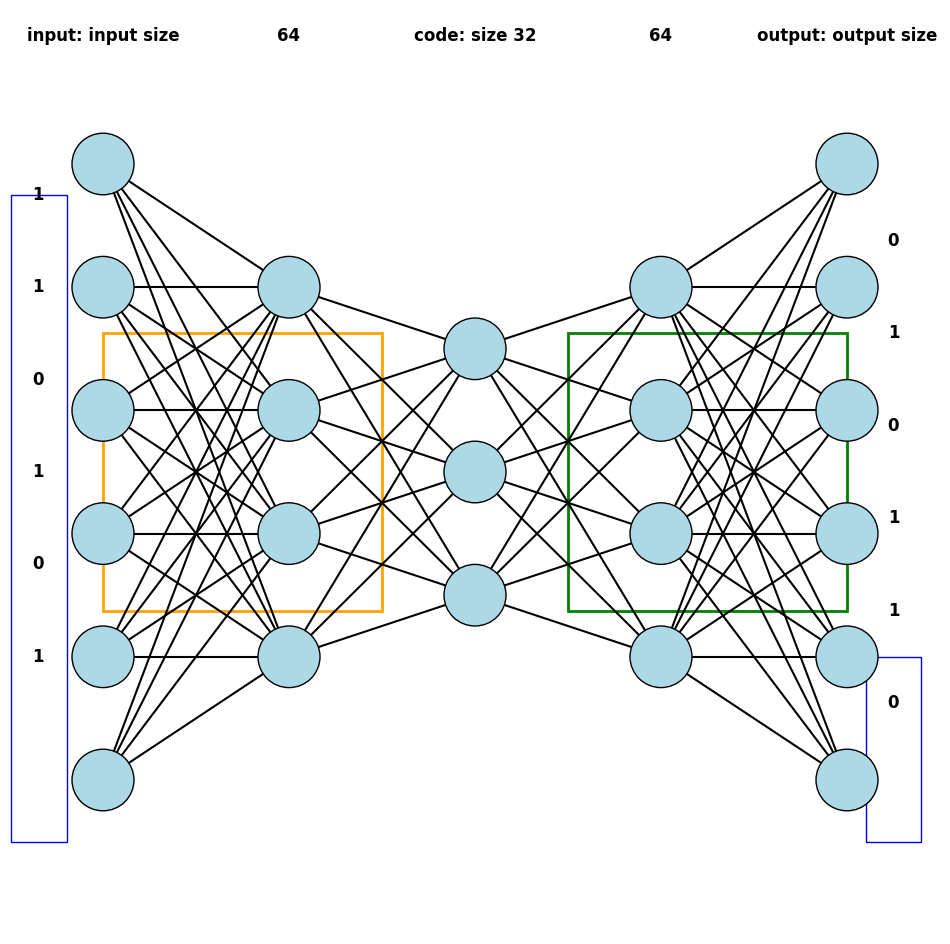

In [29]:
import matplotlib.pyplot as plt
import numpy as np

def draw_neural_net(ax, left, right, bottom, top, layer_sizes, layer_labels):
    '''
    Draw a neural network cartoon using matplotlib.
    
    :param ax: matplotlib axis
    :param left: The leftmost coordinate of the figure
    :param right: The rightmost coordinate of the figure
    :param bottom: The bottommost coordinate of the figure
    :param top: The topmost coordinate of the figure
    :param layer_sizes: List containing the number of neurons in each layer
    :param layer_labels: List containing the labels for each layer
    '''
    
    v_spacing = (top - bottom) / float(max(layer_sizes))
    h_spacing = (right - left) / float(len(layer_sizes) - 1)

    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing * (layer_size - 1) / 2. + (top + bottom) / 2.
        for m in range(layer_size):
            # Color the neurons in light blue ('lightblue')
            circle = plt.Circle((n * h_spacing + left, layer_top - m * v_spacing), v_spacing / 4.,
                                color='lightblue', ec='k', zorder=4)
            ax.add_artist(circle)

        # Add layer label at the top of each layer
        ax.text(n * h_spacing + left, top + v_spacing / 2, layer_labels[n], ha='center', fontsize=12, fontweight='bold')

    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing * (layer_size_a - 1) / 2. + (top + bottom) / 2.
        layer_top_b = v_spacing * (layer_size_b - 1) / 2. + (top + bottom) / 2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n * h_spacing + left, (n + 1) * h_spacing + left],
                                  [layer_top_a - m * v_spacing, layer_top_b - o * v_spacing], c='k')
                ax.add_artist(line)

# Example usage for an autoencoder with custom labels
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')

# Define the structure of an autoencoder: input -> hidden -> bottleneck (code) -> hidden -> output
layer_sizes = [6, 4, 3, 4, 6]  # input: 6 neurons, hidden: 4, code: 3 neurons, and symmetric decoding part

# Define the labels for each layer
layer_labels = ['input: input size', '64', 'code: size 32', '64', 'output: output size']

# Draw the neural network with labels
draw_neural_net(ax, 0.1, 0.9, 0.1, 0.9, layer_sizes, layer_labels)

# Draw rectangles around encoder and decoder
encoder_rect = plt.Rectangle((0.1, 0.35), 0.3, 0.3, fill=False, edgecolor='orange', linewidth=2, label='Encoder')
decoder_rect = plt.Rectangle((0.6, 0.35), 0.3, 0.3, fill=False, edgecolor='green', linewidth=2, label='Decoder')
ax.add_artist(encoder_rect)
ax.add_artist(decoder_rect)

# Draw input vector (0s and 1s)
input_vector = [1, 0, 1, 0, 1, 1]  # Example input vector
input_rect = plt.Rectangle((0.001, 0.1), 0.06, 0.7, fill=False, edgecolor='blue', linewidth=1)  # Rectangle for input vector
ax.add_artist(input_rect)
for i, value in enumerate(input_vector):
    ax.text(0.03, 0.5 + (i - 2.0) * 0.1, str(value), ha='center', va='center', fontsize=12, fontweight='bold')

# Draw output vector (0s and 1s)
output_vector = [0, 1, 1, 0, 1, 0]  # Example output vector
output_rect = plt.Rectangle((0.92, 0.1), 0.06, 0.2, fill=False, edgecolor='blue', linewidth=1)  # Rectangle for output vector
ax.add_artist(output_rect)
for i, value in enumerate(output_vector):
    ax.text(0.95, 0.5 + (i - 2.5) * 0.1, str(value), ha='center', va='center', fontsize=12, fontweight='bold')

plt.show()


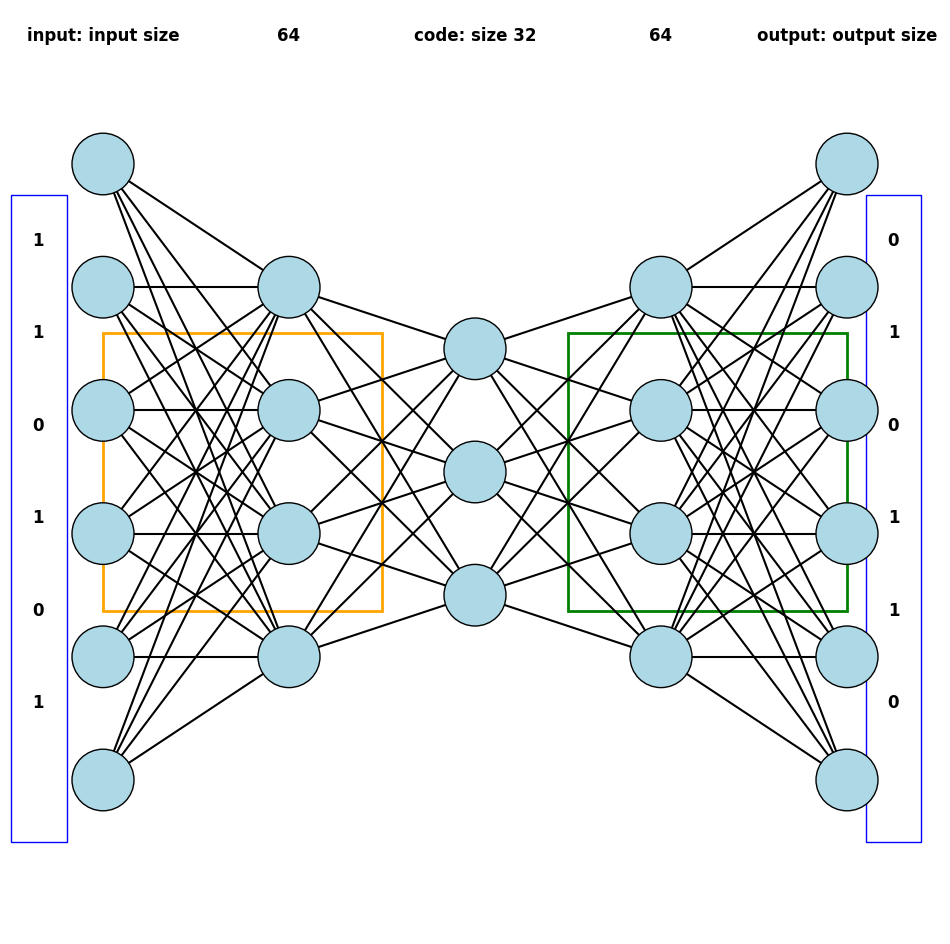

In [31]:
import matplotlib.pyplot as plt
import numpy as np

def draw_neural_net(ax, left, right, bottom, top, layer_sizes, layer_labels):
    '''
    Draw a neural network cartoon using matplotlib.
    
    :param ax: matplotlib axis
    :param left: The leftmost coordinate of the figure
    :param right: The rightmost coordinate of the figure
    :param bottom: The bottommost coordinate of the figure
    :param top: The topmost coordinate of the figure
    :param layer_sizes: List containing the number of neurons in each layer
    :param layer_labels: List containing the labels for each layer
    '''
    
    v_spacing = (top - bottom) / float(max(layer_sizes))
    h_spacing = (right - left) / float(len(layer_sizes) - 1)

    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing * (layer_size - 1) / 2. + (top + bottom) / 2.
        for m in range(layer_size):
            # Color the neurons in light blue ('lightblue')
            circle = plt.Circle((n * h_spacing + left, layer_top - m * v_spacing), v_spacing / 4.,
                                color='lightblue', ec='k', zorder=4)
            ax.add_artist(circle)

        # Add layer label at the top of each layer
        ax.text(n * h_spacing + left, top + v_spacing / 2, layer_labels[n], ha='center', fontsize=12, fontweight='bold')

    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing * (layer_size_a - 1) / 2. + (top + bottom) / 2.
        layer_top_b = v_spacing * (layer_size_b - 1) / 2. + (top + bottom) / 2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n * h_spacing + left, (n + 1) * h_spacing + left],
                                  [layer_top_a - m * v_spacing, layer_top_b - o * v_spacing], c='k')
                ax.add_artist(line)

# Example usage for an autoencoder with custom labels
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')

# Define the structure of an autoencoder: input -> hidden -> bottleneck (code) -> hidden -> output
layer_sizes = [6, 4, 3, 4, 6]  # input: 6 neurons, hidden: 4, code: 3 neurons, and symmetric decoding part

# Define the labels for each layer
layer_labels = ['input: input size', '64', 'code: size 32', '64', 'output: output size']

# Draw the neural network with labels
draw_neural_net(ax, 0.1, 0.9, 0.1, 0.9, layer_sizes, layer_labels)

# Draw rectangles around encoder and decoder
encoder_rect = plt.Rectangle((0.1, 0.35), 0.3, 0.3, fill=False, edgecolor='orange', linewidth=2, label='Encoder')
decoder_rect = plt.Rectangle((0.6, 0.35), 0.3, 0.3, fill=False, edgecolor='green', linewidth=2, label='Decoder')
ax.add_artist(encoder_rect)
ax.add_artist(decoder_rect)

# Draw input vector (0s and 1s) with alignment to neurons
input_vector = [1, 0, 1, 0, 1, 1]  # Example input vector
input_rect = plt.Rectangle((0.001, 0.1), 0.06, 0.7, fill=False, edgecolor='blue', linewidth=1)  # Rectangle for input vector
ax.add_artist(input_rect)
for i, value in enumerate(input_vector):
    ax.text(0.03, 0.5 + (i - 2.5) * 0.1, str(value), ha='center', va='center', fontsize=12, fontweight='bold')

# Draw output vector (0s and 1s) with alignment to neurons
output_vector = [0, 1, 1, 0, 1, 0]  # Example output vector
output_rect = plt.Rectangle((0.92, 0.1), 0.06, 0.7, fill=False, edgecolor='blue', linewidth=1)  # Rectangle for output vector
ax.add_artist(output_rect)
for i, value in enumerate(output_vector):
    ax.text(0.95, 0.5 + (i - 2.5) * 0.1, str(value), ha='center', va='center', fontsize=12, fontweight='bold')

plt.show()


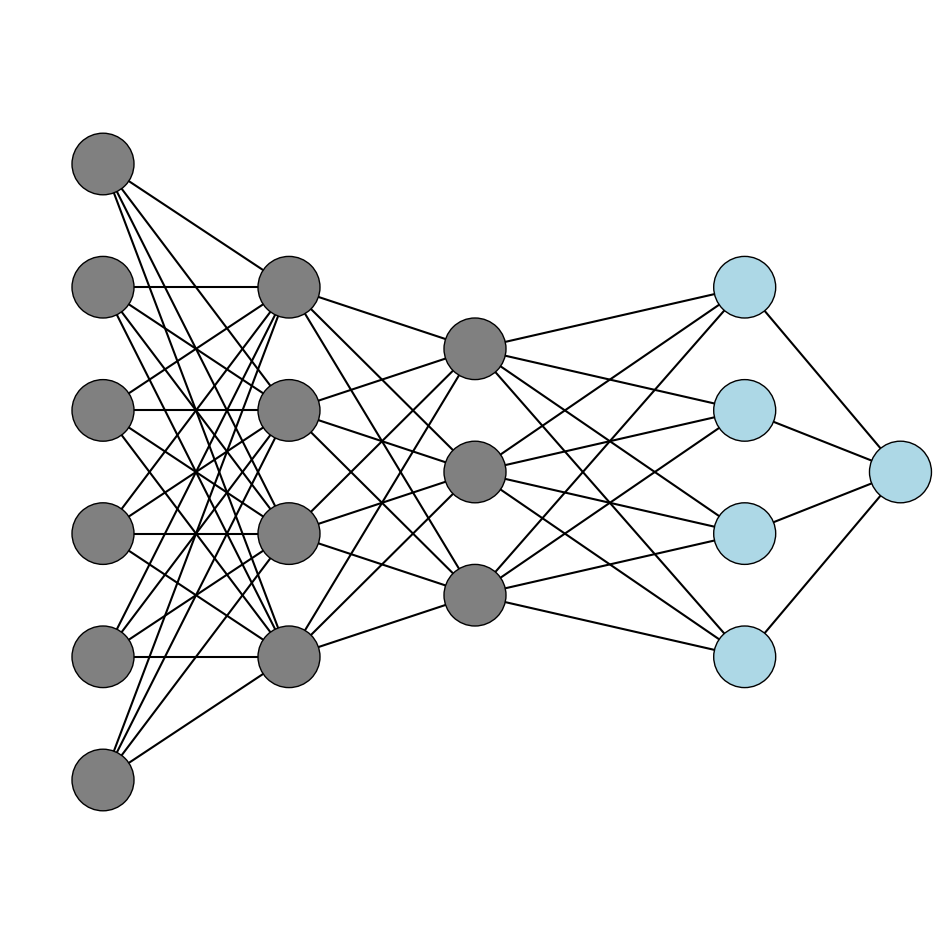

In [76]:
import matplotlib.pyplot as plt
import numpy as np

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotlib.
    
    :param ax: matplotlib axis
    :param left: The leftmost coordinate of the figure
    :param right: The rightmost coordinate of the figure
    :param bottom: The bottommost coordinate of the figure
    :param top: The topmost coordinate of the figure
    :param layer_sizes: List containing the number of neurons in each layer
    '''
    
    v_spacing = (top - bottom) / float(max(layer_sizes))
    h_spacing = (right - left) / float(len(layer_sizes) - 1)
    h_spacing_extra = h_spacing + 0.03

    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing * (layer_size - 1) / 2. + (top + bottom) / 2.
        for m in range(layer_size):
            if n == 3:
                x_pos = n * h_spacing_extra + left
                circle = plt.Circle((x_pos, layer_top - m * v_spacing), v_spacing / 4.,
                                color='lightblue', ec='k', zorder=4)
            elif n == 4:
                x_pos = n * h_spacing + h_spacing_extra / 4 + left
                circle = plt.Circle((x_pos, layer_top - m * v_spacing), v_spacing / 4.,
                                color='lightblue', ec='k', zorder=4)
            else:
                x_pos = n * h_spacing + left
                circle = plt.Circle((x_pos, layer_top - m * v_spacing), v_spacing / 4.,
                                color='gray', ec='k', zorder=4)
            
            ax.add_artist(circle)

    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing * (layer_size_a - 1) / 2. + (top + bottom) / 2.
        layer_top_b = v_spacing * (layer_size_b - 1) / 2. + (top + bottom) / 2.
        if n == 2:
            x_pos_a = n * h_spacing + left
            x_pos_b = (n + 1) * h_spacing_extra + left
        elif n == 3:
            x_pos_a = n * h_spacing_extra + left
            x_pos_b = (n + 1) * h_spacing + h_spacing_extra / 4 + left
        else:
            x_pos_a = n * h_spacing + left
            x_pos_b = (n + 1) * h_spacing + left
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([x_pos_a, x_pos_b],
                                  [layer_top_a - m * v_spacing, layer_top_b - o * v_spacing], c='k')
                ax.add_artist(line)

# Example usage for an autoencoder
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')

# Define the structure of an autoencoder: input -> hidden -> bottleneck (code) -> hidden -> output
layer_sizes = [6, 4, 3, 4, 1]  # input: 6 neurons, hidden: 4, code: 3 neurons, and symmetric decoding part

# Draw the neural network without labels or values
draw_neural_net(ax, 0.1, 0.9, 0.1, 0.9, layer_sizes)

plt.show()
